<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?-(Её-можно-обучить-заново.)" data-toc-modified-id="Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?-(Её-можно-обучить-заново.)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Предложите-алгоритм-преобразования-данных-для-решения-задачи.-Обоснуйте,-почему-качество-линейной-регрессии-не-поменяется." data-toc-modified-id="Предложите-алгоритм-преобразования-данных-для-решения-задачи.-Обоснуйте,-почему-качество-линейной-регрессии-не-поменяется.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Запрограммируйте-этот-алгоритм,-применив-матричные-операции.-Проверьте,-что-качество-линейной-регрессии-из-sklearn-не-отличается-до-и-после-преобразования.-Примените-метрику-R2." data-toc-modified-id="Запрограммируйте-этот-алгоритм,-применив-матричные-операции.-Проверьте,-что-качество-линейной-регрессии-из-sklearn-не-отличается-до-и-после-преобразования.-Примените-метрику-R2.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

RANDOM_STATE = 13

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.shape

(5000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.duplicated().sum()

153

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.rename(columns={
    'Пол': 'sex',
    'Возраст': 'age',
    'Зарплата': 'salary',
    'Члены семьи': 'family_members',
    'Страховые выплаты': 'insurance_payments',
}, inplace=True)
df.tail()

,sex,age,salary,family_members,insurance_payments
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


In [8]:
df.sex.unique()

array([1, 0])

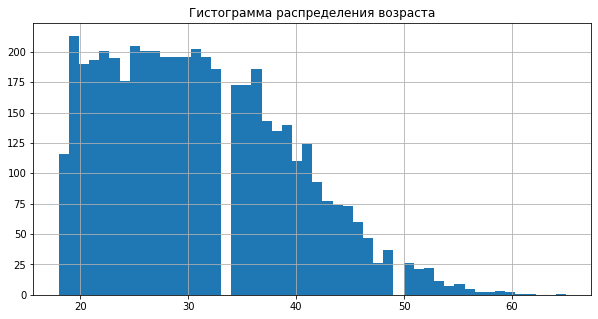

In [9]:
df.age.hist(figsize=(10, 5), bins=50)
plt.title('Гистограмма распределения возраста')
plt.show()

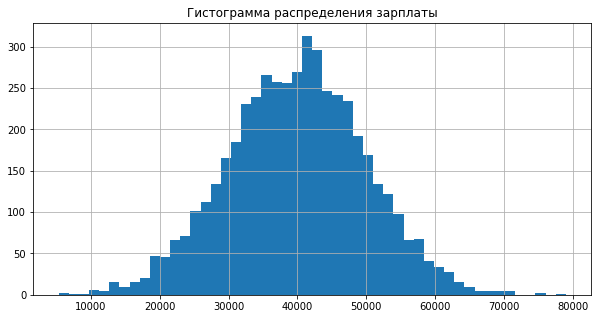

In [10]:
df.salary.hist(figsize=(10, 5), bins=50)
plt.title('Гистограмма распределения зарплаты')
plt.show()

In [11]:
df.family_members.value_counts()

1    1748
0    1461
2    1038
3     437
4     124
5      32
6       7
Name: family_members, dtype: int64

In [12]:
df.insurance_payments.value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: insurance_payments, dtype: int64

Преобразуем тип данных:

In [13]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :", start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            try:
                result = (props[col] - asint)
                result = result.sum()
                if result > -0.01 and result < 0.01:
                    IsInt = True

                # Make Integer/unsigned Integer datatypes
                if IsInt:
                    if mn >= 0:
                        if mx < 255:
                            props[col] = props[col].astype(np.uint8)
                        elif mx < 65535:
                            props[col] = props[col].astype(np.uint16)
                        elif mx < 4294967295:
                            props[col] = props[col].astype(np.uint32)
                        else:
                            props[col] = props[col].astype(np.uint64)
                    else:
                        if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                            props[col] = props[col].astype(np.int8)
                        elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                            props[col] = props[col].astype(np.int16)
                        elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                            props[col] = props[col].astype(np.int32)
                        elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                            props[col] = props[col].astype(np.int64)    

                # Make float datatypes 32 bit
                else:
                    props[col] = props[col].astype(np.float32)

                # Print new column type
                print("dtype after: ",props[col].dtype)
                print("******************************")
            except TypeError:
                pass
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist
df, NAlist = reduce_mem_usage(df)

Memory usage of properties dataframe is : 0.2218780517578125  MB
******************************
Column:  sex
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  age
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  salary
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  family_members
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  insurance_payments
dtype before:  int64
dtype after:  uint8
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  0.0739593505859375  MB
This is  33.333333333333336 % of the initial size


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
sex                   4847 non-null uint8
age                   4847 non-null uint8
salary                4847 non-null float32
family_members        4847 non-null uint8
insurance_payments    4847 non-null uint8
dtypes: float32(1), uint8(4)
memory usage: 75.7 KB


Для начала познакомились с данными:
- У нас 5000 записей и 5 фичей
- Нет пропущенных значений
- Есть дубликаты - 153 строки - удалили
- Переименовали столбцы в привычные нам
- Посмотрели на распределение возраста и зарплаты
- Оценили значения family_members и insurance_payments: все в пределах нормы
- Преобразовали тип данных и сократили объем df в 3 раза

## Умножение матриц

Ответьте на вопрос и обоснуйте решение.
### Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

Для начала как пример необходимо построить модель линейной регрессии, затем матрицу признаков обратить и построить вторую модель линейной регрессии с обратимыми признаками. Сделаем это

In [15]:
features = df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

In [16]:
lr_simple = LinearRegression()
lr_simple.fit(features, target)
print(f"Оценочные коэффициенты для задачи линейной регрессии:\n{lr_simple.coef_}")

Оценочные коэффициенты для задачи линейной регрессии:
[ 9.4588054e-03  3.6164001e-02 -1.3411045e-07 -1.4251745e-02]


Теперь обучим линейную регрессию без применения библиотеки sklearn

Задачу обучения запишем в векторном виде. Обучающую выборку представим как матрицу X, в которой строки соответствуют объектам, а столбцы — признакам. В матрицу X добавим столбец, состоящий только из единиц (он идёт нулевым);

In [17]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target

Параметры линейной регрессии обозначим w и w0. Чтобы получить вектор предсказаний a, умножим матрицу X на вектор w и прибавим величину сдвига w0. Добавим параметр w0 — к вектору w:

Можно прочитать эту формулу так: обратная матрица произведения X транспонированного на Х, умноженное на Х транспонированное и умноженное на y. Выполним это:

In [18]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [19]:
w[1:]

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

Коэффициенты получились аналогичные

## Алгоритм преобразования

###  Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

В предыдущем пункте мы использовали подстановочную матрицу Z = XP, где X - матрица признаков, а P - обратимая матрица. Доказали что, наши предсказания a1, которые мы получали от матрицы Z равны предсказаниям a от матрицы X, из чего следует, что мы можем использовать произвольную обратимую матрицу для преобразования данных, при этом результат предсказания будет идентичен, а данные будут хаотичные.

Алгоритм действий:
<ol>
<li>Составляем матрицу Y</li>
<li>Проверяем матрицу Y на обратимость с помощью <b>numpy.linalg.inv()</b>, если матрица необратима, то будет обнаружена ошибка</li>
<li>Получаем матрицу преобразованных признаков Z</li>
<li>Тренируем алгоритм линейной регрессии на новых данных, результат для данных Z и X будет совпадать</li>
</ol>

## Проверка алгоритма

### Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=RANDOM_STATE)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred)
print(f"coef: {lr.coef_}")
print(f"R2 = {r2_lr}")

coef: [ 1.8237164e-02  3.7026826e-02 -4.2468309e-07 -1.0950450e-02]
R2 = 0.40873828978154736


Отмасштабируем признаки с помощью StandardScaler:

In [22]:
scaller = StandardScaler()
X_train_sс = scaller.fit_transform(X_train)
X_test_sс = scaller.transform(X_test)
lr_sk = LinearRegression()
lr_sk.fit(X_train_sс, y_train)
y_pred = lr_sk.predict(X_test_sс)
r2_lr_sk = r2_score(y_test, y_pred)
print(f"coef: {lr_sk.coef_}")
print(f"R2 = {r2_lr_sk}")

coef: [ 0.00911554  0.31786273 -0.00418023 -0.01195525]
R2 = 0.4087414031998282


Видно что качество модели по метрике R2 не изменилось, а веса немного занулились.


Теперь реализуем и применим алгоритм, описанный в п.3:

In [23]:
def generate_new_features(old_features):
    # получаем количество фичей
    n = old_features.shape[1]
    # для воспроизводимости случайных величин
    np.random.seed(RANDOM_STATE)
    # здесь можно было бы сделать проверку, но честно говоря у меня не было пока ошибки необратимости матрицы, 
    # и согласно лекциям урока эта вероятность стремится к нулю
    Y = np.random.rand(n, n)
    np.linalg.inv(Y)
    Z = old_features @ Y
    return Z, Y

Посмотрим что у нас получилось. Преобразуем нашу изначальную матрицу фичей:

In [28]:
features, y = generate_new_features(features)
print(f"Изначальная матрица:\n{features}")
print(f"Матрица для шифрования:\n{y}")
print(f"Финальная матрица:\n{z}")

Изначальная матрица:
                 0             1             2             3
0     61631.235558  37806.527084  53682.164458  69174.892718
1     47240.492492  28986.139349  41147.014840  53024.965187
2     26111.794409  16023.478109  22743.646228  29309.712517
3     51793.114143  31764.177346  45113.262576  58130.134228
4     32441.512877  19904.214977  28257.111460  36413.538025
...            ...           ...           ...           ...
4995  44357.571696  27209.596981  38636.300029  49786.501456
4996  65093.635485  39924.529322  56698.389087  73059.283644
4997  42110.409933  25827.658143  36679.188819  47263.212036
4998  40626.860906  24920.636418  35386.640770  45598.817964
4999  50439.533059  30938.441573  43934.094154  56612.444519

[4847 rows x 4 columns]
Матрица для шифрования:
[[0.77770241 0.23754122 0.82427853 0.9657492 ]
 [0.97260111 0.45344925 0.60904246 0.77552651]
 [0.64161334 0.72201823 0.03503652 0.29844947]
 [0.05851249 0.85706094 0.37285403 0.67984795]]


Как мы видим матрица изменилась до неузнаваемости

Снова разделим матрицу и построим модели:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=RANDOM_STATE)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred)
print(f"coef: {lr.coef_}")
print(f"R2 = {r2_lr}")

coef: [ 0.03400849  0.14250156  0.50848102 -0.47755103]
R2 = 0.40874140320197605


In [27]:
scaller = StandardScaler()
X_train_sс = scaller.fit_transform(X_train)
X_test_sс = scaller.transform(X_test)
lr_sk = LinearRegression()
lr_sk.fit(X_train_sс, y_train)
y_pred = lr_sk.predict(X_test_sс)
r2_lr_sk = r2_score(y_test, y_pred)
print(f"coef: {lr_sk.coef_}")
print(f"R2 = {r2_lr_sk}")

coef: [  216.30257188  1019.94097336   176.55902239 -1412.79754142]
R2 = 0.4087414031998453


Видим, что R2 не меняется(во всех случаях 0.4), а значит качество предсказаний остается неизменным. Меняются только веса в зависимости от значений фичей матрицы.

По итогу теоретически и практически доказали, что если матрицу изменить путем умножения на обратимую матрицу, то  качество предсказаний лин регрессии не меняется, меняются только веса.